# Lab1-part2  2020.01

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import time

X, y = generate_MG_data()

In [1]:
def timeSeries():
    t = [1.5]
    for i in range(0, 1600):
        tmp = 0.
        if i - 25 >= 0:
            tmp = t[i - 25]
        t.append(t[i] + 0.2 * tmp / (1 + tmp ** 10) - 0.1 * t[i]);
    X = []
    y = []
    for i in range(301, 1501):
        X.append([t[i - 20], t[i - 15], t[i - 10], t[i - 5], t[i]])
        y.append(t[i + 5])
    combined = list(zip(X, y))
    #np.random.shuffle(combined)
    X[:], y[:] = zip(*combined)
    return t, X, y

In [4]:
def timeSeries_with_noise(sigma):
    
    t = [1.5]
    for i in range(0, 1600):
        tmp = 0.
        if i - 25 >= 0:
            tmp = t[i - 25]
        t.append(t[i] + 0.2 * tmp / (1 + tmp ** 10) - 0.1 * t[i]);
    
    noise = np.random.normal(0,sigma,len(t))
    t += noise
    X = []
    y = []
    for i in range(301, 1501):
        X.append([t[i - 20], t[i - 15], t[i - 10], t[i - 5], t[i]])
        y.append(t[i + 5])
    combined = list(zip(X, y))
    #np.random.shuffle(combined)
    X[:], y[:] = zip(*combined)
    return t, X, y

In [56]:
ts, X, y = timeSeries()
len(X)

1200

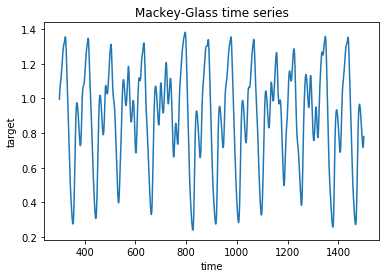

In [57]:
plt.plot(range(301,1501),y)
plt.xlabel("time")
plt.ylabel("target")
plt.title("Mackey-Glass time series")
plt.show()

In [64]:
trainX = X[0:1000]
trainY = y[0:1000]

testX = X[1000:1200]
testY = y[1000:1200]


loss = []
for i in range(1, 9):
    for j in range(1, 2):
      
        clf = MLPRegressor(max_iter=10000,solver='adam', alpha=10 ** (-j), hidden_layer_sizes=(i,), 
                           random_state=1, early_stopping=True, validation_fraction = 0.1)
        clf.fit(trainX, trainY)
           
        print (clf.loss_, clf.score(testX, testY))
    loss.append(np.round(clf.loss_,9))
        

0.03934553189516328 -0.013122645202337857
0.0061858775922675495 0.8688502283383959
0.008317544397884017 0.7530536193779437
0.0031093026748740854 0.9749650226805823
0.0053301483474571506 0.908887781630541
0.003110044982085982 0.9798660881689422
0.0031588255248226303 0.9812015044222618
0.00618866748614303 0.8899573245307018


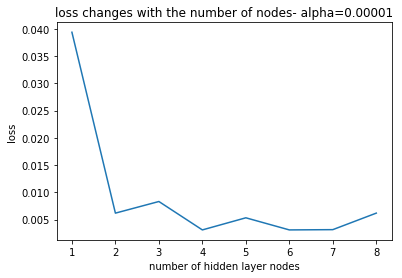

array([0.03935, 0.00619, 0.00832, 0.00311, 0.00533, 0.00311, 0.00316,
       0.00619])

In [65]:
plt.plot(range(1,9), loss)
plt.xlabel("number of hidden layer nodes")
plt.ylabel("loss")
plt.title("loss changes with the number of nodes- alpha=0.00001")
plt.show()
np.round(loss,5)

In [ ]:
clf = MLPRegressor(max_iter=10000, solver='lbfgs', alpha=10 ** (-4), hidden_layer_sizes=(7,), 
                   random_state=1, early_stopping=True, validation_fraction = 0.1)
clf.fit(trainX, trainY)
output = clf.predict(testX)
clf.coefs_

In [ ]:
x=clf.coefs_[0]
plt.hist(x, bins=10)
plt.title("histogram for weights, alpha=0.0001,bins=10")

In [ ]:
clf = MLPRegressor(max_iter=10000, solver='lbfgs', alpha=10 ** (-5), hidden_layer_sizes=(7,), 
                   random_state=1, early_stopping=True, validation_fraction = 0.1)
clf.fit(trainX, trainY)
output = clf.predict(testX)
x=clf.coefs_[0]
plt.hist(x, bins=10)
plt.title("histogram for weights, alpha=0.00001,bins=10")

In [ ]:
plt.plot(range(0,200), testY, output)
plt.legend( ('original y', 'predicted y'))
plt.xlabel("number of data")
plt.ylabel(" values")
plt.title("predict y and original y")
plt.show()

In [ ]:
ts, X, y = timeSeries_with_noise(0.03)
plt.plot(range(301,1501),y)
plt.xlabel("time")
plt.ylabel("target")
plt.title("Mackey-Glass time series-sigma=0.03")
plt.show()

In [ ]:
len(ts)

In [ ]:
trainX = X[0:1000]
trainY = y[0:1000]
trainY_copy = np.copy(trainY)

testX = X[1000:1200]
testY = y[1000:1200]

expTime = 100
loss = []
for i in range(1, 9):
    for j in range(4, 5):
        sumTest = 0.
        
        for k in range(expTime):
            clf = MLPRegressor(max_iter=10000, solver='lbfgs', alpha=10 ** (-j), hidden_layer_sizes=(7,i),
                               random_state=1, early_stopping=True, validation_fraction = 0.1)
            clf.fit(trainX, trainY)
            #print clf.score(testX, testY)

            sumTest += clf.score(testX, testY)
        print (clf.loss_, np.round(sumTest/expTime,4))
    loss.append(np.round(clf.loss_,9))
        

In [14]:
sigma = [0.03, 0.09, 0.18]
loss = np.zeros([3,8])
for k in range(3):
    ts, X, y = timeSeries_with_noise(sigma[k])
    trainX = X[0:1000]
    trainY = y[0:1000]
    trainY_copy = np.copy(trainY)

    testX = X[1000:1200]
    testY = y[1000:1200]
    
    for i in range(1, 9):
        for j in range(4, 5):
            sumTest = 0.
        
            
            clf = MLPRegressor(max_iter=10000, solver='adam', alpha=10 ** (-j), hidden_layer_sizes=(7,i), 
                               random_state=1, early_stopping=True, validation_fraction = 0.1)
            clf.fit(trainX, trainY)
            #print clf.score(testX, testY)

        print (clf.loss_)
        loss[k][i-1]= np.round(clf.loss_,9)
loss

0.03981016148247045
0.002037652682165321
0.0019093294801515658
0.001958829081202697
0.001971443062936727
0.0020660782377502607
0.006056569493709139
0.006463428326119283
0.044033769061324245
0.011033812085720043
0.01535976178906147
0.014792128883655756
0.010373138981084891
0.010769127930952489
0.010161883740867973
0.01256138362351064
0.0530111953754142
0.03304611978790393
0.033020039885450256
0.03120098585688938
0.02945316682291188
0.03071220912620764
0.03052586224549338
0.029828162886017445


array([[0.03981016, 0.00203765, 0.00190933, 0.00195883, 0.00197144,
        0.00206608, 0.00605657, 0.00646343],
       [0.04403377, 0.01103381, 0.01535976, 0.01479213, 0.01037314,
        0.01076913, 0.01016188, 0.01256138],
       [0.05301119, 0.03304612, 0.03302004, 0.03120099, 0.02945317,
        0.03071221, 0.03052586, 0.02982816]])

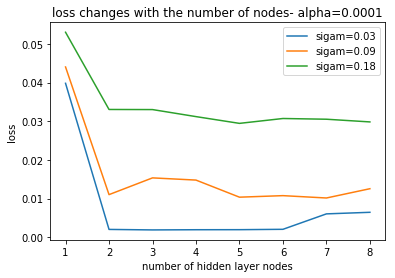

array([[0.03981016, 0.00203765, 0.00190933, 0.00195883, 0.00197144,
        0.00206608, 0.00605657, 0.00646343],
       [0.04403377, 0.01103381, 0.01535976, 0.01479213, 0.01037314,
        0.01076913, 0.01016188, 0.01256138],
       [0.05301119, 0.03304612, 0.03302004, 0.03120099, 0.02945317,
        0.03071221, 0.03052586, 0.02982816]])

In [15]:
for i in range(3):
    plt.plot(range(1,9), loss[i])
plt.xlabel("number of hidden layer nodes")
plt.ylabel("loss")
plt.title("loss changes with the number of nodes- alpha=0.0001")
plt.legend(["sigam=0.03","sigam=0.09","sigam=0.18"])
plt.show()
loss

In [ ]:
trainX = X[0:1000]
trainY = y[0:1000]

testX = X[1000:1200]
testY = y[1000:1200]
clf = MLPRegressor(max_iter=10000, solver='lbfgs', alpha=10 ** (-4), hidden_layer_sizes=(7,3), 
                   random_state=1, early_stopping=True, validation_fraction = 0.1)
clf.fit(trainX, trainY)
output = clf.predict(testX)

plt.plot(range(0,200), testY, output)
plt.legend( ('original y', 'predicted y'))
plt.xlabel("number of data")
plt.ylabel(" values")
plt.title("predict y and original y- size(7,3) sigma=0.03")
plt.show()

In [5]:
ts, X, y = timeSeries_with_noise(0.09)



In [38]:
loss2 = []
acc2 = []
t0 = time.perf_counter()
for i in range(30):
    
    trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2)
    clf2 = MLPRegressor(max_iter=10000, solver='adam', alpha=10 ** (-1), hidden_layer_sizes=(7,), 
                        random_state=1, early_stopping=True, validation_fraction = 0.1)
    clf2.fit(trainX, trainY)
    loss2.append(clf2.loss_)
    acc2.append(clf2.score(testX, testY))
print(time.perf_counter()-t0)
print(np.mean(loss2),np.std(loss2),np.mean(acc2))

16.252895391000038
0.01434874853219832 0.00572019540453284 0.7118794332945618


In [39]:
loss3 = []
acc3 = []
t0 = time.perf_counter()
for i in range(30):
    
    trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2)
    clf3 = MLPRegressor(max_iter=10000, solver='adam', alpha=10 ** (-1), hidden_layer_sizes=(7,5,),
                        random_state=1, early_stopping=True, validation_fraction = 0.1)
    clf3.fit(trainX, trainY)
    loss3.append(clf3.loss_)
    acc3.append(clf3.score(testX, testY))
print(time.perf_counter()-t0)
print(np.mean(loss3),np.std(loss3),np.mean(acc3))

17.73069796400023
0.012810369866640582 0.0012690473716314094 0.7506393387806007


In [41]:
ts, X, y = timeSeries()

In [6]:
loss0 = []
acc0 = []
t0 = time.perf_counter()
for i in range(30):
    
    trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2)
    clf0 = MLPRegressor(max_iter=10000, solver='adam', alpha=0, hidden_layer_sizes=(7,), random_state=1, 
                        early_stopping=True, validation_fraction = 0.1)
    clf0.fit(trainX, trainY)
    loss0.append(clf0.loss_)
    acc0.append(clf0.score(testX, testY))
print(time.perf_counter()-t0)
print(np.mean(loss0),np.std(loss0),np.mean(acc0)) 

24.453715622000345
0.010864599406052769 0.0034325300428097293 0.7489183665328707


In [6]:
loss0 = []
acc0 = []
t0 = time.perf_counter()
for i in range(30):
    
    trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2)
    clf0 = MLPRegressor(max_iter=10000, solver='adam', alpha=10 ** (-1), hidden_layer_sizes=(7,2,),
                        random_state=1, early_stopping=True, validation_fraction = 0.1)
    clf0.fit(trainX, trainY)
    loss0.append(clf0.loss_)
    acc0.append(clf0.score(testX, testY))
print(time.perf_counter()-t0)
print(np.mean(loss0),np.std(loss0),np.mean(acc0)) 

40.97096763500008
0.014057665713555765 0.006222246769167175 0.7243927897642336


In [44]:
loss0 = []
acc0 = []
t0 = time.perf_counter()
for i in range(30):
    
    trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2)
    clf0 = MLPRegressor(max_iter=10000, solver='adam', alpha=10 ** (-1), hidden_layer_sizes=(7,5,), 
                        random_state=1, early_stopping=True, validation_fraction = 0.1)
    clf0.fit(trainX, trainY)
    loss0.append(clf0.loss_)
    acc0.append(clf0.score(testX, testY))
print(time.perf_counter()-t0)
print(np.mean(loss0),np.std(loss0),np.mean(acc0)) 

30.295150076000027
0.003122253068614879 0.0016434152761974931 0.9730624326603695
